# Data preprocessing

In this notebook, we willl figure out what transforms would be the best to get images of wanter size (224x224) while preserving as much information as possible. We are then going to use them to get the resized dataset.

In [19]:
import torch
import torchvision.transforms as T
import torchvision.io as tio

import matplotlib.pyplot as plt

import os

To start off, let's look at an example from dataset

In [7]:
def pil_image(path):
    return T.functional.to_pil_image(tio.read_image(path))

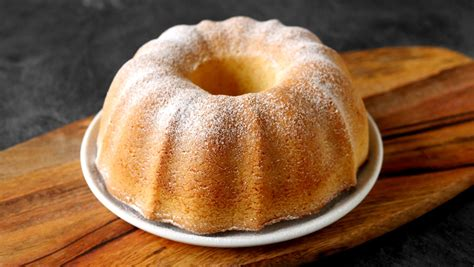

In [8]:
pil_image("../data/raw/babovka/11.png")

Let's try resizing and cropping the image (we will also include normalization at the end of each transformation, as the pretrained models where trained with that exact normalization; in this notebook, the normalization is commented out).

In [9]:
def tensor_to_pill(image):
    return T.functional.to_pil_image(image)

In [10]:
preprocess = T.Compose([
    T.Resize(224),
    T.CenterCrop(224),
    T.ToTensor()
    # T.Normalize(
    #    mean=[0.485, 0.456, 0.406],
    #    std=[0.229, 0.224, 0.225]
    # )
])

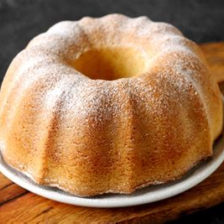

In [11]:
image = pil_image("../data/raw/babovka/11.png")
preprocessed = preprocess(image)
tensor_to_pill(preprocessed)

Perfect! Let's look at a single example from each class.

In [12]:
image_paths = [
    "../data/raw/babovka/11.png",
    "../data/raw/apple_pie/12.png",
    "../data/raw/cheesecake/42.png",
    "../data/raw/maulwurfkuchen/17.png",
    "../data/raw/muffin/59.png"
]

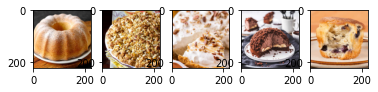

In [17]:
fig = plt.figure()

for i, image_path in enumerate(image_paths):
    ax = fig.add_subplot(1, 5, i + 1)
    
    image = pil_image(image_path)
    preprocessed = preprocess(image)
    ax.imshow(tensor_to_pill(preprocessed))

Looks like the preprocessing works well for this dataset. Let's iterate through the dataset and apply the preprocessing to all images.

In [21]:
classes = [
    "apple_pie",
    "babovka",
    "cheesecake",
    "maulwurfkuchen",
    "muffin"
]

raw_dir = "../data/raw/"
resized_dir = "../data/resized/"

In [26]:
for c_name in classes:
    source = raw_dir + c_name + "/"
    target = resized_dir + c_name + "/"
    
    for file in os.listdir(source):
        filename = os.fsdecode(file) 
        name_from = source + filename
        name_to = target + filename
        
        image = pil_image(name_from)
        preprocessed = preprocess(image)
        image_new = tensor_to_pill(preprocessed)
        
        image_new.save(name_to)